# Grammys Project
![](https://www.moviedebuts.com/wp-content/uploads/2021/05/ra_ga_logo.png)

Are you excited to dive into data work for an exciting project at The Recording Academy? You know, the non-profit organization behind the Grammy Awards!

In this project, you'll work on real data from both websites owned by The Recording Academy, the non-profit organization behind the famous Grammy Awards. As you just learned, Ray Starck, the VP of Digital Strategy, decided to split the websites into grammy.com and recordingacademy.com to better serve the Recording Academy's various audience needs.

Now, you are tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior on both sites.  

Are you ready?!?!

Let's do this!

![](https://media.giphy.com/media/ZSK6UPKTSLZCKd7orz/giphy.gif)

## Data Dictionary
To start, you will be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part I - Exploratory Data Analysis

![](https://media.giphy.com/media/6y6fyAD9OIE6NvhJEu/giphy.gif)

## Task 1

Import the `pandas`,`numpy`, and `plotly.express` libraries.

In [40]:
# Import libraries
import pandas as pd
import plotly.express as px
import numpy as np

In [41]:
# RUN THIS CELL - DO NOT MODIFY
# this formats numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** For the `grammy_live_web_analytics.csv` file store that into a dataframe called `full_df`

**B.** For the `ra_live_web_analytics.csv` file store that into a dataframe called `rec_academy`

**C.** Preview the dataframes to familiarize yourself with the data.

All files needed can be found in the `datasets` folder.

In [42]:
# Read in dataframes
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')
rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')

In [43]:
# preview full_df dataframe
print(full_df.head())

         date  visitors  pageviews  sessions  bounced_sessions  \
0  2017-01-01      9611      21407     10196              6490   
1  2017-01-02     10752      25658     11350              7055   
2  2017-01-03     11425      27062     12215              7569   
3  2017-01-04     13098      29189     13852              8929   
4  2017-01-05     12234      28288     12990              8105   

   avg_session_duration_secs  awards_week  awards_night  
0                         86            0             0  
1                        100            0             0  
2                         92            0             0  
3                         90            0             0  
4                         95            0             0  


In [44]:
# preview rec_academy dataframe
print(rec_academy.head())

         date  visitors  pageviews  sessions  bounced_sessions  \
0  2022-02-01       928       2856      1092               591   
1  2022-02-02      1329       3233      1490               923   
2  2022-02-03      1138       3340      1322               754   
3  2022-02-04       811       2552       963               534   
4  2022-02-05       541       1530       602               326   

   avg_session_duration_secs  awards_week  awards_night  
0                        148            0             0  
1                         90            0             0  
2                        127            0             0  
3                        142            0             0  
4                        111            0             0  


## Task 3

We all know The Grammy Awards is *the* biggest music event in the music industry, but how many visitors does that bring to the website?

**A.** Create a line chart of the number of users on the site for every day in the `full_df`. See if you can spot the days the Grammys awards are hosted.

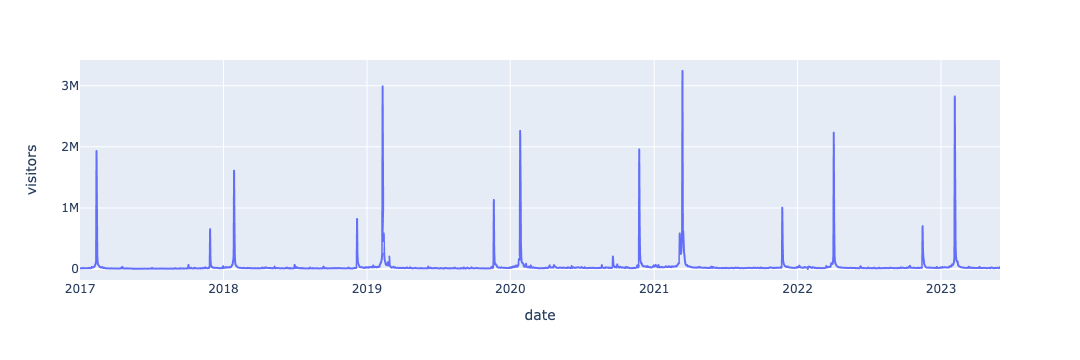

In [45]:
# Plot a line chart of the visitors on the site. 
fig = px.line(full_df, x='date', y='visitors')
fig.show()

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Remark:** The smaller spikes, typically around November/December of each year, are when the nominees are announced.</span>

**B.** What can you say about the visitors to the website by looking at the graph?

What I can determine from this line chart is that the site received the most amount of visitors around the years 2017 to 2023, within those years there were massive spikes in the number of users present especially near the end of of each year. At an annual rate, there is a gigantic spike in users on a particular day that is greater than those there during the announcement of the Grammy Awards. After that point, there's a tiny spike at a constant rate of viewers in the web traffic. Based on these observations we can determine that massive spikes in visitors are due to the annual yearly events hosted on the website, which would potentially garner new viewers, while the smaller spikes that remain at a constant rate are the average constant viewers of the site.

## Task 4

Let's investigate what an "average" day looks like when the awards show is being hosted versus the other 364 days out of the year.

**A.** Use the pandas `.groupby()` to calculate the number of visitors on the site based on the values in the column `awards_night`.

In [46]:
full_df.groupby(['awards_night']).agg({'visitors':'mean'})

,visitors
awards_night,
0,32388.28
1,1389590.23


**B.** What can you say about these results? Roughly how many more visitors are on the website for the awards ceremony versus a regular day?

The results about visitors who are on the website on an average day regularly are greater than those who visit for the awards ceremony. Those who visit regularly are over 1,000,0000 compared to those during the awards ceremony. But this is the case in certain months every 3 years periodically.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Remark:** This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of **one** event per year into one that continues to bring users back on the site year round?</span>

## Task 5

When The Recording Academy decided to split their website into two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. So the `full_df` variable needs to be split separately into two dataframes. The day the domains were switched is on `2022-02-01`.

Create two new dataframes:

1. `combined_site` for all dates before `2022-02-01`
2. `grammys` for all dates after (and including) `2022-02-01`

In [109]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after
combined_site = full_df[full_df['date'] < '2022-02-01']    #format to be used to split data in specfic row
grammys = full_df[full_df['date'] >= '2022-02-01']

In [110]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a scary-looking warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [49]:
# print the shape of the combined_site dataframe
combined_site.shape

(1857, 8)

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly, the `combined_site` dataframe should have a total of `1857` rows and `8` columns</span>

# Part II - It's all about KPIs

![](https://media.giphy.com/media/zoKdmndB8QBR2c0gjy/giphy.gif)

There are certain key performance indicators (KPIs) of interest for The Recording Academy. Let's investigate those a little more.

## Task 6

**A.** Create a new list called `frames` that has the `combined_site`, `rec_academy`, and `grammys` dataframes as entries. e.g. If the 3 dataframes were `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

In [50]:
# create the list of dataframes
frames = [combined_site, rec_academy, grammys]

**B.** For each frame in the frames list, create a new column `pages_per_session`. This new column is the average number of pageviews per session on a given day. The higher this number the more "stickiness" your website has with your visitors.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** Divide the `pageviews` by `sessions`</span>

This can be achieved by using the following template:

```python
for frame in frames:
    frame['new_col'] = frame['col_A'] / frame['col_B']
```

In [51]:
# create the `pages_per_session` column for all 3 dataframes.
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']

**C.** Visualize this new metric using a line chart for each site. (You will have 3 separate graphs)

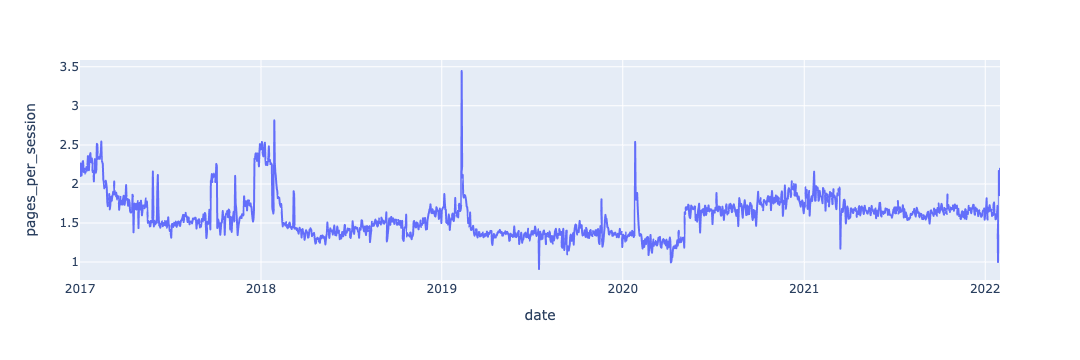

In [52]:
# combined_site graph
show = px.line(combined_site, x='date', y='pages_per_session')
show.show()

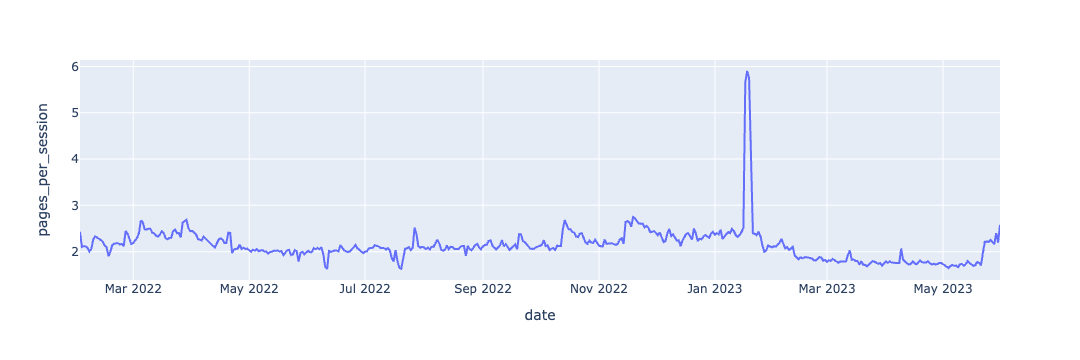

In [53]:
# grammys graph
show = px.line(grammys, x='date', y='pages_per_session')
show.show()

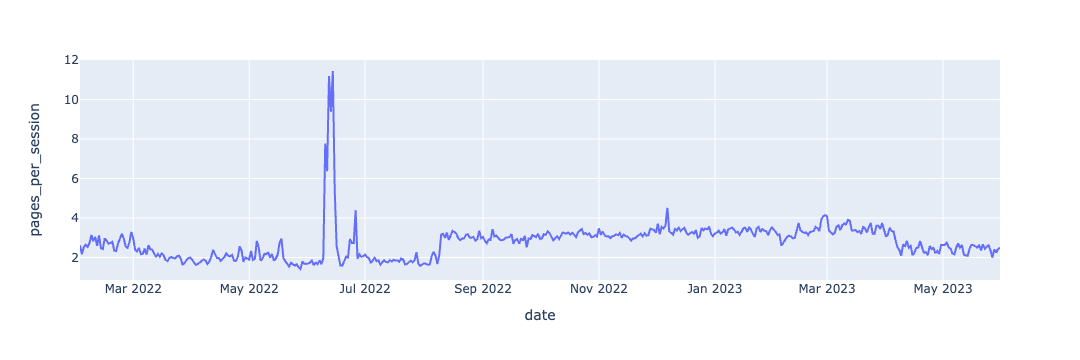

In [77]:
# rec_academy graph
show = px.line(rec_academy, x='date', y='pages_per_session')
show.show()

**D.** Looking at the 3 charts above, what can you say about the `pages_per_session` when the websites were combined versus after they were split?

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Note:** Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.</span>

The pages_per_session for the combined_site had a constant fluctuation of pages per session with points in which the data spikes were rising, such as in the year 2018 and 2020 the page-per-session spikes then proceeded to go in a constant fluctuation, but then seemingly trailed off near the end in 2022 and 2023. For the Grammys the same can be seen across the board from May 2022 to January 2023 There is a constant fluctuation of pages_per_session but in the middle of those there are dips that occur in the 1.6 range and from January 2023 there's a decrease from there to May 2023 until all of a sudden there an instant rate of change where the pages_per_session increases, which is potentially tied to the announcement of the Grammys. The same cannot be said for the rec_academy as there's a constant flow of pages per session with the occasional dips and abnormalities between May and July of 2022. After 2022 it increases and then proceeds to fluctuate from Sep 2022 till March 2023 where it then decreases, which does conicde with the recacedmy having a steady bounce rate in Task 3.

## Task 7

Bounce rate is another important metric for The Recording Academy. Bounce Rate is a measure of the percentage of visitors who come to the site and *never  interact with the website and leave*. In this task, you will define a function that takes in a dataframe as input and outputs the bounce rate.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** You will need use the `.sum()` function both in the `sum_bounced` and `sum_sessions` calculations. Don't forget to multiply by `100` so that the answer appears as a percentage instead of a decimal.</span>

In [55]:
#SCRAP:

In [76]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    # WRITE YOUR CODE BELOW
    # Remember, the input for the function is called `dataframe`
    # So all calculations should reference that variable.
    sum_bounced = dataframe['bounced_sessions'].sum()
    sum_sessions = dataframe['sessions'].sum()
    return (100 * sum_bounced / sum_sessions)
    
    
    
    


**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

A template for getting the function to work will look like code below. Remember that this is NOT the print statement, you will still need to add that part.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** To get the bounce rate use `bounce_rate(frame)` </span>

```python
for frame in frames:
    my_value = my_function(frame)
```

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Tip:** If you want to reduce the number of decimals shown in an f-string, you can add `:0.2f` just before the end of the curly brackets but after your variable. Example: `print(f'my value is: {my_value:0.2f}')`</span>

In [75]:
# Calculate the Bounce Rate for each site. Use the frames list you created in Task 6.
track = 0
frame_name = ['combined_site', 'rec_academy', 'grammys']
for frame in frames:
    my_value = bounce_rate(frame)
    print(f'The bounce rate for {frame_name[track]} is: {my_value:0.2f}')
    track += 1

The bounce rate for combined_site is: 41.58
The bounce rate for rec_academy is: 33.67
The bounce rate for grammys is: 40.16


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly, the `combined_site` and `grammys` site will each have bounce rates in the low 40s. The `rec_academy` will have a bounce rate in the low 30s</span>

**C.** Another useful metric is how long on average visitors are staying on the website.

Calculate the `mean` of the `avg_session_duration_secs` for each of the sites.
Print each one using an f-string.

In [74]:
# Calculate the average of the avg_session_duration_secs. Use the frames list you created in Task 6.
frames = [combined_site, rec_academy, grammys]
count = 0
frame_names = ['combined_site', 'rec_academy', 'grammys']
for frame in frames:
    answer = frame['avg_session_duration_secs'].mean()
    print(f'The average of {frame_names[count]} for avg_session_duration_secs is {answer:.2f}')
    count += 1

The average of combined_site for avg_session_duration_secs is 102.85
The average of rec_academy for avg_session_duration_secs is 128.50
The average of grammys for avg_session_duration_secs is 82.99


**D.** What can you say about these two metrics as it relates to each of the websites?

Within the first metric, there are similarities present, as the bounce rates for the combined_site and the Grammys are both in the low 40s, with a deviation of 1.42 between the two. In contrast, the Recording Academy has a bounce rate in the low 30s, indicating that it has the lowest bounce rate among the three. When we compare this with the second metric, we see a correlation: the Recording Academy has an average session duration of 128.50 seconds, while the Grammys has a shorter average duration of 82.99 seconds, and the combined_site has an average duration of 102.85 seconds.

A clear correlation can be observed here: the lower the bounce rate, the higher the average session duration. This is exemplified by the Recording Academy, which has a bounce rate of 33.67 and an average session duration of 128.50 seconds. Conversely, a higher bounce rate corresponds to a lower average session duration, as seen in both the combined_site and the Grammys. For example, the combined_site has a bounce rate of 41.58 and an average session duration of 102.85 seconds, while the Grammys has a bounce rate of 40.16 and an average session duration of 82.99 seconds.

# Part III - Demographics

![](https://media.giphy.com/media/GrUhLU9q3nyRG/giphy.gif)

Age demographics are a way to see which audience(s) your content is resonating with the most. This can inform marketing campaigns, ads, and much more.

Let's investigate the demographics for the two websites. This will require reading in two new files and joining them in python.

## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demographics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [73]:
# read in the files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [60]:
# preview the age_grammys file. the age_tra will look very similar.
age_tra.head()

,age_group,pct_visitors
0,18-24,27.12
1,25-34,26.16
2,35-44,19.55
3,45-54,13.82
4,55-64,8.24


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [61]:
# create the website column
age_tra['website'] = 'Recording Academy'
age_grammys['website'] = 'Grammys'

**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** Remember that you need to put your dataframe variables inside of a **list** first then pass that as your input of `pd.concat()`</span>

In [72]:
# use pd.concat to join the two datasets
lst = [age_tra, age_grammys]
result = pd.concat(lst)
result

,age_group,pct_visitors,website
0,18-24,27.12,Recording Academy
1,25-34,26.16,Recording Academy
2,35-44,19.55,Recording Academy
3,45-54,13.82,Recording Academy
4,55-64,8.24,Recording Academy
5,65+,5.12,Recording Academy
0,18-24,27.37,Grammys
1,25-34,24.13,Grammys
2,35-44,18.72,Grammys
3,45-54,13.57,Grammys


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly your new dataframe will have `12` rows and `3` columns.</span>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** You will need to use the `barmode='group'` option in `px.bar()`. See the code snippet below to guide you.</span>

```python
# template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

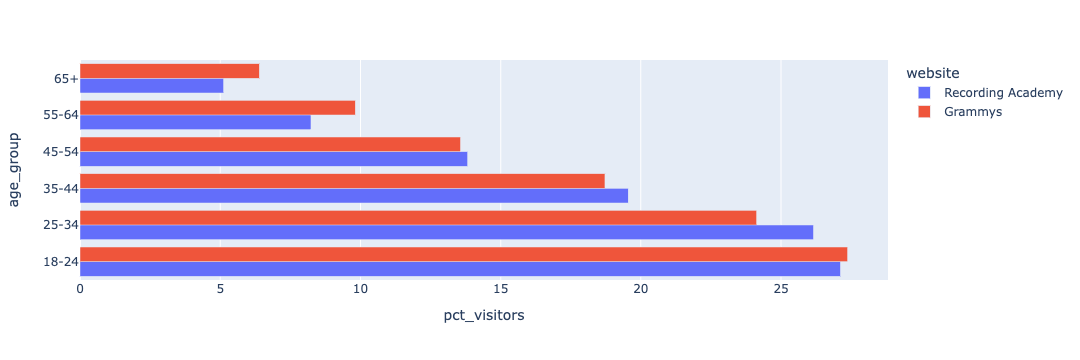

In [63]:
# Create bar chart
px.bar(result, x='pct_visitors', y='age_group', color='website', barmode='group')

**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

Both websites have a significant percentage of visitors in the age range of 18-24, but the Grammys website has more viewers (27.37321 pct_vistiors) compared to the recording academy (27.11683 pct_vistiors) by a slight deviation of 0.25638. However within the age ranges of 25-34 the Recording Academy (26.15541 pct_vistiors) has larger margin of viewers compared to the Grammys (24.12927 pct_vistiors) by a larger deivaiton of 2.02614. 

As we go further down the age ranges of 35-44 theres a decrease in the amoount of pct_vistiors primarily for the Grammys as they fall under the 20 point mark, the same can be seen for the Recording Academy as well under the 20 point mark but is greater than it by 1 point. For the age ranges 55-64 and 65+ it falls below the 10 pct_visitor mark, with a bigger discrpency in the amount of viewrs for Recording acdemy as they recieve less viewers than the Grammys.

# Part IV - Recommendation
![](https://media.giphy.com/media/0Av9l0VIc01y1isrDw/giphy.gif)

## Task 9

Using the work you did in this project, would you recommend that the websites stay separate? Please give a 2-3 paragraph answer using details from the analysis work above explaining why or why not they should stay separate.

I recommend that the websites for both the Grammys and the Recording Academy remain separate to cater to their nearly identical age demographics. Despite the similarities in age ranges, a discrepancy exists in the number of viewers engaging with either the Recording Academy or the Grammys. Over time viewer participation begins to decrease which coincides in the page per session count. This distinction can help the website creators and the organization hosting these events to target specific subsets of viewers better.

A low pages-per-session count could indicate that older users engage less with the site, primarily seeking specific information. In contrast, a high pages-per-session count might suggest a younger demographic's willingness to explore the site more extensively. To address these differences, it is crucial to analyze the underlying causes of both low and high engagement. This includes identifying whether specific topics, features, or individuals are driving significant user interest for both the Grammys and the Recording Academy. Furthermore, it is essential to evaluate how user interface (UI) elements impact engagement—are they effectively tailored to meet the needs of individual users, or are they trying to cater to a broader demographic? Additionally, the role of algorithms should be examined to determine whether they are effectively personalizing the experience and contributing to audience retention and satisfaction.

# LevelUp
![](https://media.giphy.com/media/6fUIhrlrHCzEHvY8oF/giphy.gif)

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your task is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.

![](figs/TheAMAs.png)

Let's review some of the content from above.

The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [64]:
# Load in the data
desktop_users = pd.read_csv('datasets/desktop_users.csv')
mobile_users = pd.read_csv('datasets/mobile_users.csv')

In [65]:
# preview the desktop_users file
desktop_users.head()

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [66]:
# preview mobile_users file
mobile_users.head()

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [79]:
# change name of the visitors column to indicate which category it comes from
mobile_users.rename(columns={'date':'mobile_date'}, inplace=True)
mobile_users.rename(columns={'visitors':'mobile_visitors'}, inplace=True)
desktop_users.rename(columns={'visitors':'desktop_visitors'}, inplace=True)
desktop_users.rename(columns={'date':'desktop_date'}, inplace=True)

In [68]:
# drop the segment column from each dataframe
desktop_users.drop(columns=['segment'], inplace=True)
mobile_users.drop(columns=['segment'], inplace=True)

**C.** Join the two dataframes together in a new variable called `segment_df`.

In [80]:
# join the two dataframes and preview the dataframe
segment_df = pd.concat([desktop_users, mobile_users], axis=1)
segment_df.head()

,desktop_date,desktop_visitors,mobile_date,mobile_visitors
0,2022-02-01,10195,2022-02-01,23494
1,2022-02-02,10560,2022-02-02,20234
2,2022-02-03,9935,2022-02-03,22816
3,2022-02-04,8501,2022-02-04,18592
4,2022-02-05,5424,2022-02-05,13298


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [81]:
# create total_visitors column
segment_df['total_visitors'] = segment_df['desktop_visitors'] + segment_df['mobile_visitors']
segment_df.head()

,desktop_date,desktop_visitors,mobile_date,mobile_visitors,total_visitors
0,2022-02-01,10195,2022-02-01,23494,33689
1,2022-02-02,10560,2022-02-02,20234,30794
2,2022-02-03,9935,2022-02-03,22816,32751
3,2022-02-04,8501,2022-02-04,18592,27093
4,2022-02-05,5424,2022-02-05,13298,18722


To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.

In [108]:
# filter and calculate the percentage share
filtered_data = segment_df[
    (segment_df['desktop_date'] >= '2023-04-01') & (segment_df['mobile_date'] >= '2023-04-01')][['desktop_visitors', 'mobile_visitors', 'total_visitors']]

desktop_sum = segment_df['desktop_visitors'].sum()
total_sum = segment_df['total_visitors'].sum()
mobile_sum = segment_df['mobile_visitors'].sum()

desktop_share = (desktop_sum/total_sum) * 100
mobile_share = (mobile_sum/total_sum) * 100
print(f'The mobile share is {mobile_share:.1f} and the desktop share is {desktop_share:.1f}')
print(f'The total number of visitors on the sight are {total_sum}')

The mobile share is 73.6 and the desktop share is 26.4
The total number of visitors on the sight are 21569056


**What is the percentage share of desktop and mobile visitors on the Grammys website in the timeframe in question?**

The percentage of shares of desktop visitors are 26.4% and the mobile visitors are 73.6%.

**What is the total number of visitors on the site during this timeframe?**

The total number of visitors on the site are 21,569,056.
*(Double-click this cell to write your answer)*

**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?
The Grammys website performs well compared to its competitor the AMA with a total visitor count of 21,569,056 compared to AMA's 37,389 viewers. Despite this, there are areas of improvement for the Grammys website: the bounce rate for the Grammys is at 40.16% which is significantly lower than the AMA's by a deviation of 14.15%. The best way to improve these key aspects is to monitor the pages_per_session metric over time in order to analyze points where the user attention is focused heavily more on a particular region, this can allow for enhancement of content optimization in order to better gauge viewer count.